In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Rick Fontenot
- Name 2: Joe Lazarus
- Name 3: DJ Dawkins
- Nmae 4: Puri Rudick

________

# In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading.

<a id="top"></a>
## Contents
* <a href="#testing">Testing R Magics</a>
* <a href="#understand">Understanding the Data Representation</a>
* <a href="#apriori">Finding Frequent Items</a>

** The following will be available during live session: **
* <a href="#candidates">Generating Candidates</a>
* <a href="#arules">Using ARules and ARulesViz</a>

________________________________________________________________________________________________________

<a id="testing"></a>
<a href="#top">Back to Top</a>

## Running in the 'R' Kernel
In the Jupyter Notebook menu, Go to Kernel > Change Kernel and select 'R'

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


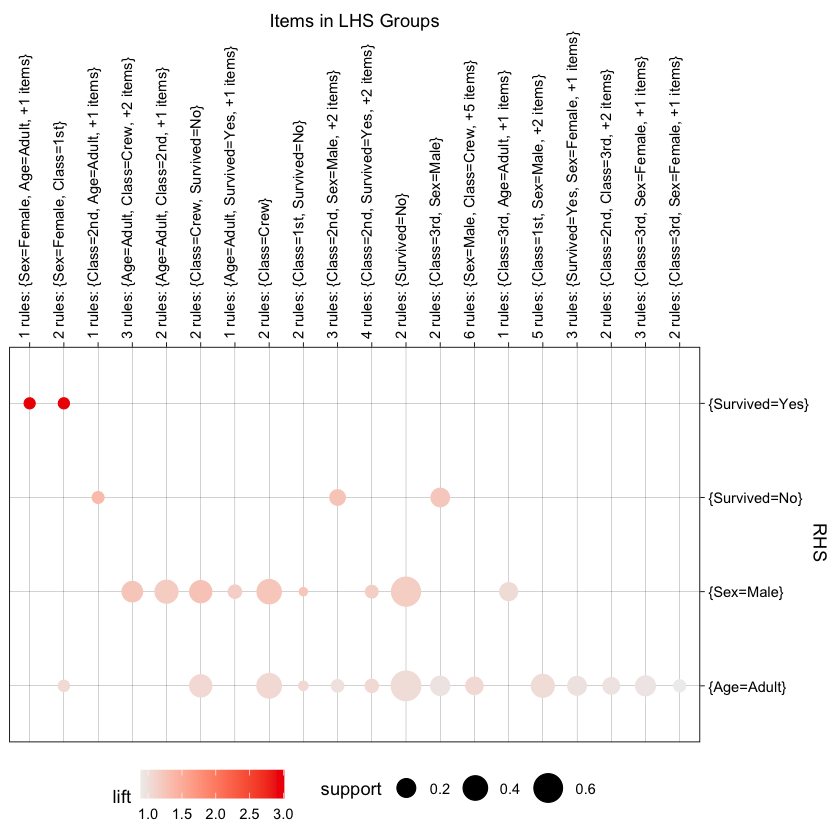

In [6]:
library(arules)
library(arulesViz)

load('titanic2.raw.rdata')
rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
rules.sorted <- sort(rules, by='lift')
plot(rules.sorted, method='grouped') 

___
<a id="understand"></a>
<a href="#top">Back to Top</a>
## Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the social class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different/similar. What makes an item in this dataset?

___
**Enter your answer here:**

The Titanic dataset is NOT a typical example of transaction data.

In transaction data, each of the record involves with a set of items with numerous possible combinations.  Like in the grocery store transaction data, it has itemsets vary from 2 to 5.  On the other hand, the Titanic dataset consistently contains 4 columns for each record. 
___

## Running in the Python 3 Kernel
In the Jupyter Notebook menu, Go to Kernel > Change Kernel and select 'Python 3'

<a id="apriori"></a>
<a href="#top">Back to Top</a>
## Frequent Itemsets and Apriori
Run the following code to look at 3 and 4-itemsets in the Titanic dataset.

In [1]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [13]:
df = pd.read_csv('titanic_raw.csv',index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


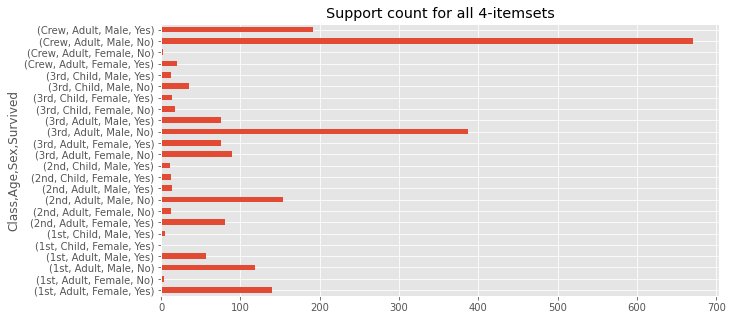

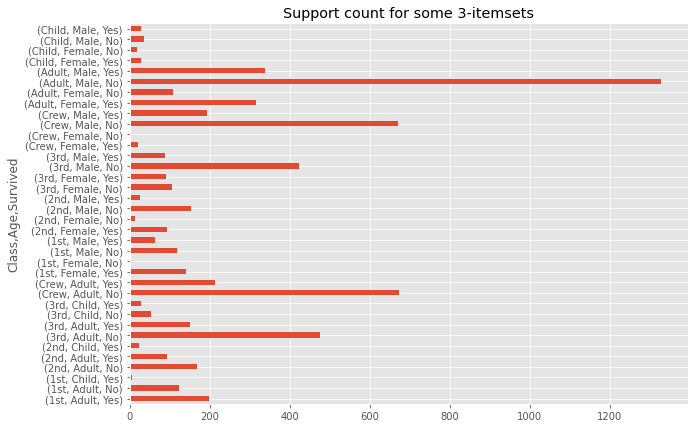

In [10]:
plt.style.use('ggplot')

# Now lets plot the number of times each itemset occurs graphically
# find counts of the four itemsets
f = plt.figure(figsize=(10,5))
df_grouped = df.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')
plt.show()

#Plot 3-itemsets
df_grouped = df.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts() #.reset_index(name='Counts')
df_grouped = df.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts() #.reset_index(name='Counts')
df_grouped = df.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts() #.reset_index(name='Counts')

df = pd.concat((countsA,countsB,countsC)).plot(kind='barh', figsize=(10,7), title='Support count for some 3-itemsets')

Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Question-A**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question-B**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
**Enter your answer here:**

*We know from df.info() above that the total records in the Titanic dataset is 2201 entries.*

**Question-A:**
- Support Count: $\sigma$ {1st, Adult, Yes} = 198
- Support: s {1st, Adult, Yes} = $\frac{198}{2201}$ = 0.09
- Support Count: $\sigma$ {1st, Adult, Yes, Female} = 140
- Support: s {1st, Adult, Yes, Female} = $\frac{140}{2201}$ = 0.06

**Question-B**
- $c=\frac{\sigma( X \cup Y)}{\sigma( X )}$
- $c$ for the rule {1st, Adult, Yes} $\rightarrow$ {Female}= $\frac{140}{198}$ = 0.71


___
**Question**: What is the support count (an integer) for a *minsup* threshold of 0.25? Using the support count graphs above, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

- Support Count for a minsup threshold of 0.25 = 0.25*2201 = 550.25 (let's say 551)
- There are 3 of 3-itemsets that would be considered frequent with a minsup of 0.25: {Adult, Male, No}, {Crew, Male, No}, {Crew, Adult, No}
- There is 1 of 4-itemsets that would be considered frequent with a minsup of 0.25: {Crew, Adult, Male, No}
- The 4-itemsets is maximal because it contains all of the columns that considered frequent.
---


___
# Start of Live Session Assignment
<a id="candidates"></a>
<a href="#top">Back to Top</a>
### Generating candidates 
Assume that the 3-itemset bar graph above contains ALL the possible frequent 3-itemsets in the titanic dataset and their support count. 

**Exercise**: If the minimum support count equals 200, then use the bar graph to select the 3-itemsets that are frequent. Use these itemsets and the apriori principle to generate candidate 4-itemsets that might be frequent. Please show your thought process. 

___
**Enter your answer here:**

If the minimum support count equals 200, the 3-itemsets that are frequent:
* {Adult, Male, Yes}
* {Adult, Male, No}
* {Adult, Female, Yes}
* {Crew, Male, No}
* {Crew, Adult, Yes}
* {Crew, Adult, No}
* {3rd, Male, No}
* {3rd, Adult, No}

Generate candidate 4-itemsets that might be frequent:
* {Adult, Male, Yes} & {Crew, Adult, Yes} —> {Crew, Adult, Male, Yes}
* {Adult, Male, No} & {Crew, Male, No} —> {Crew, Adult, Male, No}
* {Adult, Male, No} & {3rd, Adult, No} —> {3rd, Adult, Male, No}
* {Adult, Female, Yes} & {Crew, Adult, Yes} —> {Crew, Adult, Female, Yes}



___
<a id="arules"></a>
<a href="#top">Back to Top</a>
## Using the Arules Package to Interpret Data
Run the following R code to run the Apriori algorithm on the titanic dataset. 

**Exercise**: Change the parameters of the apriori algorithm in order to check your results from the previous question. That is, change the minlen, supp, and conf parameters so that it only displays 4-itemsets with minimum "support count" of 200. Do the itemsets from the resulting rules match with what you found in the previous questions? Should they? Why or why not?

In [4]:
#==========================
# IF USING R RUN THIS CODE
#==========================
load("titanic2.raw.rdata")
rules <- apriori(titanic.raw,parameter = list(minlen=4, supp=0.091, conf=0.71))
rules.sorted <- sort(rules, by="support")
inspect(rules.sorted)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.71    0.1    1 none FALSE            TRUE       5   0.091      4
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 200 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                   rhs           support   confidence
[1] {Class=Crew,Sex=Male,Survived=No}  => {Age=Adult}   0.3044071 1.0000000 
[2] {Class=Crew,Age=Adult,Survived=No} => {Sex=Male}    0.3044071 0.9955423 
[3] {Class=Crew,Sex=Male,Age=Adult}    => {Survived=No} 0.

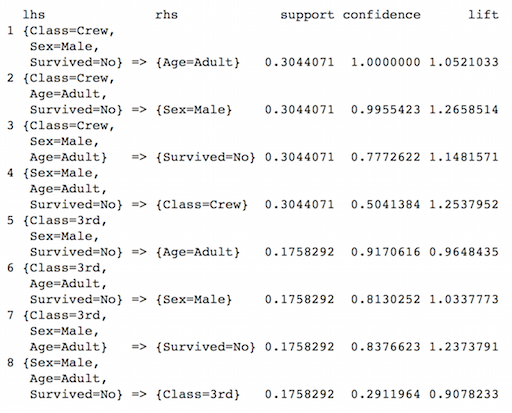

In [2]:
#========================================================================================================
# IF NOT USING R RUN THIS CODE (It is an example snapshot of using arules) AND INTERPRET THE OUTPUTS
#========================================================================================================
from IPython.display import Image
Image('R_arules_output.png')

#========================================================================================================
# Also, change the parameters to the following line of code to what you think they should be to answer the question:
#========================================================================================================

# rules <- apriori(titanic.raw,parameter = list(minlen=1, supp=0.01, conf=0.01))

___
Enter your answer here:

The R out put has 2 outputs that match our candidates , but two of them are missing which is {Crew, Adult, Male, Yes} and {Crew, Adult, Female, Yes}.  This is because ours are candidates to consider than the R code removes 2 candidate with minsupp of .091 (200/2201).  

___

## Using the Arules Viz Package 
Now run the following code to visualize the rules from the previous step. There are various parameters built into the visualization such as support, confidence, and a parameter known as "lift." Lift is a measure that ranks different rules using the equation 
$$ Lift = \frac{P(Y|X)}{P(Y)} = \frac{c(X\rightarrow Y)}{s(Y)} $$
In practice, there are many different measures that we use to rank the rules from a dataset, but, at the end of the day, a human evaluates which rules are most subjectively interesting. The arulesViz library allows many different types of interpretations for looking at lift and confidence together. The documentation is here:
http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf 

The styles of plot are "scatterplot", "two-key plot", "matrix", "matrix3D", "graph", "paracoord" or "grouped." Each provides a different view of the rules. Try at least three plots using the boilerplate code below (you just need to change the "method" parameter of the plot). After looking at the visualizations answer the following:

**Question**: Which rules are the most interesting according to Lift, according to confidence, and, lastly, according to you? Why?

[1] "The Graphic for rules grouped by lift and their support"


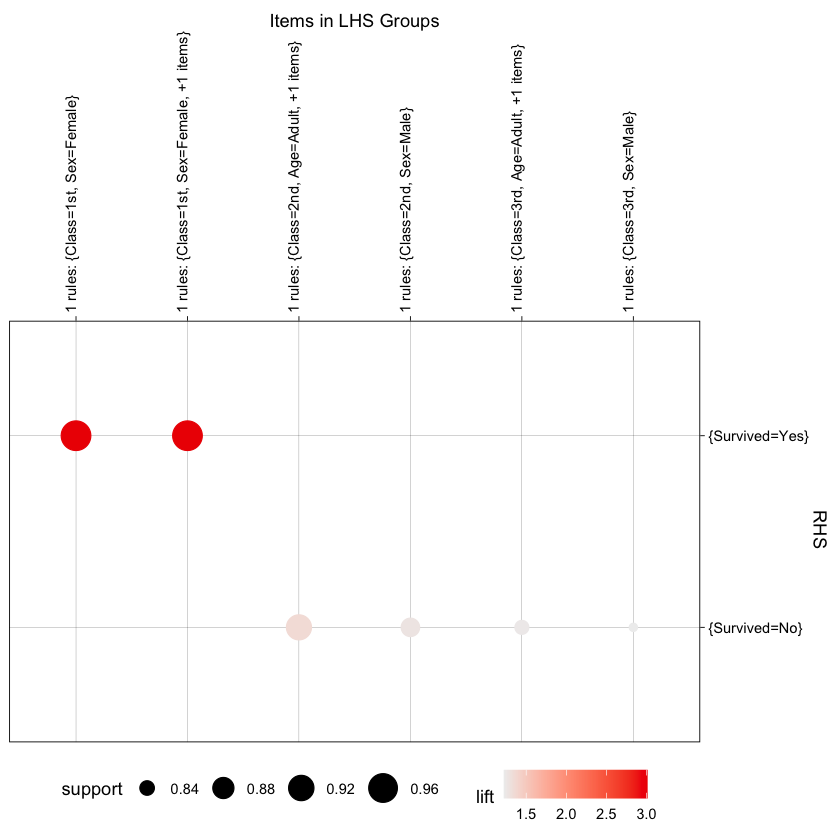

In [8]:
#=========================================
# IF USING R, RUN THIS CODE
#=========================================
# do not change the arules code
rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
rules.sorted <- sort(rules, by="lift")

# change or add plots using the following lines:
plot(rules.sorted, method="grouped", measure = 'confidence', shading='lift')

print('The Graphic for rules grouped by lift and their support')

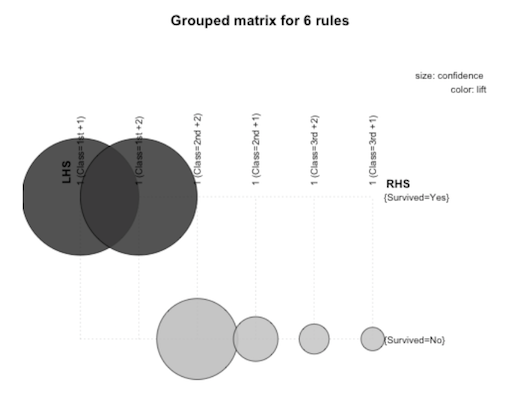

In [1]:
#======================================================================
#IF NOT USING R RUN THIS BLOCK AND THE BLOCK AFTERWARD TO SEE EXAMPLES 
#======================================================================
from IPython.display import Image
Image('Arules_grouped.png')

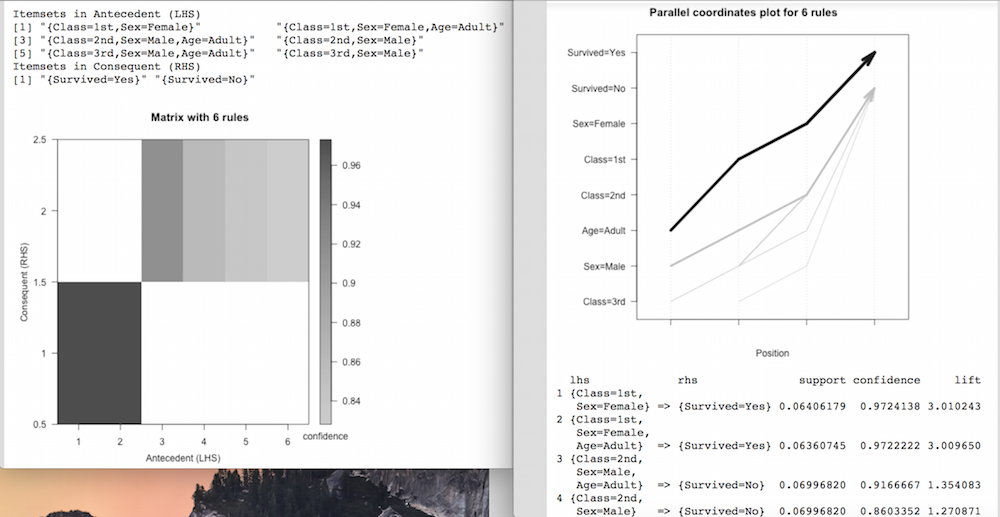

In [2]:
Image('Arules_graph2_3.png')

___
**Enter your answer here:**

The most important rules according to lift are:
- {Class=1st, Sex=Female} -> {Survived=Yes}
- {Class=1st, Sex=Female, Age=Adult} -> {Survived=Yes}

The most important rules according to support are:
- {Class=1st, Sex=Female} -> {Survived=Yes}
- {Class=1st, Sex=Female, Age=Adult} -> {Survived=Yes}
- {Class=2nd, +2 items} -> {Survived=No}

The most important rules according to confidence are:
- {Class=1st, Sex=Female} -> {Survived=Yes}
- {Class=1st, Sex=Female, Age=Adult} -> {Survived=Yes}
- {Class=2nd, Sex=Male, Age=Adult} -> {Survived=No}

The most important rule according to us are:
- {Class=1st, Sex=Female} -> {Survived=Yes}
- {Class=1st, Sex=Female, Age=Adult} -> {Survived=Yes}

This is because Confidence alone does not show how good or interesting a rule might be.  To us the most importances are the one that rank highest for all lift, support, and confidence.

___


**Question**: Who is the lead author (and maintainer) for the arules package and the arulesViz package? What University does he/she currently teach at?

http://cran.r-project.org/web/packages/arules/arules.pdf

http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf

___
**Enter your answer here:**

The lead author for arules & arulesViz packages is Michael Hahsler. Who teaches at SMU’s Lyle School of Engineering at SMU.


___



________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook** and please include **team member names** in the notebook submission.